# Import the Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')
data = pd.read_csv("onlinefoods.csv")

In [2]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
data.shape

(388, 13)

In [4]:
# Enumerate the columns
for index, column in enumerate(data.columns):
    print(f"Column {index}: {column}")

Column 0: Age
Column 1: Gender
Column 2: Marital Status
Column 3: Occupation
Column 4: Monthly Income
Column 5: Educational Qualifications
Column 6: Family size
Column 7: latitude
Column 8: longitude
Column 9: Pin code
Column 10: Output
Column 11: Feedback
Column 12: Unnamed: 12


In [5]:
#df = data.iloc[:,0:17]

# **So the dataset contains information like:**

- the age of the customer
- marital status of the customer
- occupation of the customer
- monthly income of the customer
- educational qualification of the customer
- family size of the customer
- latitude and longitude of the location of the customer
- pin code of the residence of the customer
- did the customer order again (Output)
- Feedback of the last order (Positive or Negative)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


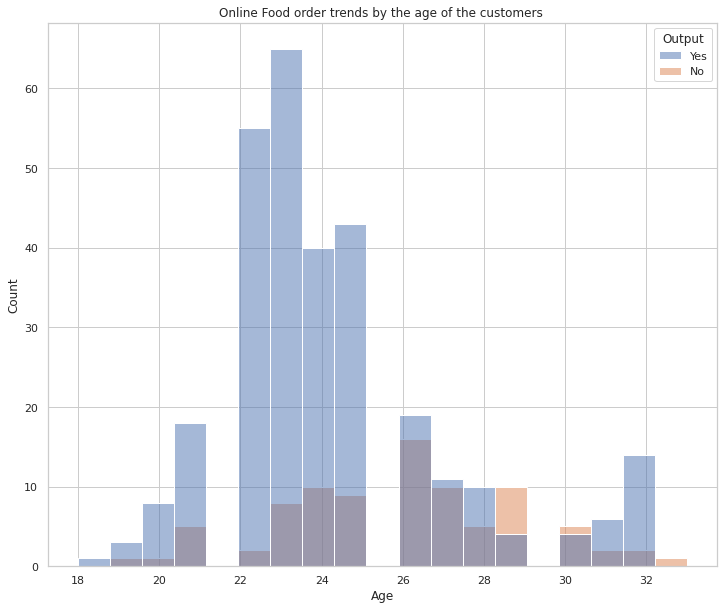

In [7]:
plt.figure(figsize=(12,10))
plt.title("Online Food order trends by the age of the customers ")
sns.histplot(x='Age',hue='Output',data=data)
plt.show()

We can see that the age group of 22-25 ordered the food often again. It also means this age group is the target of online food delivery companies. Now let’s have a look at the online food order decisions based on the size of the family of the customer:

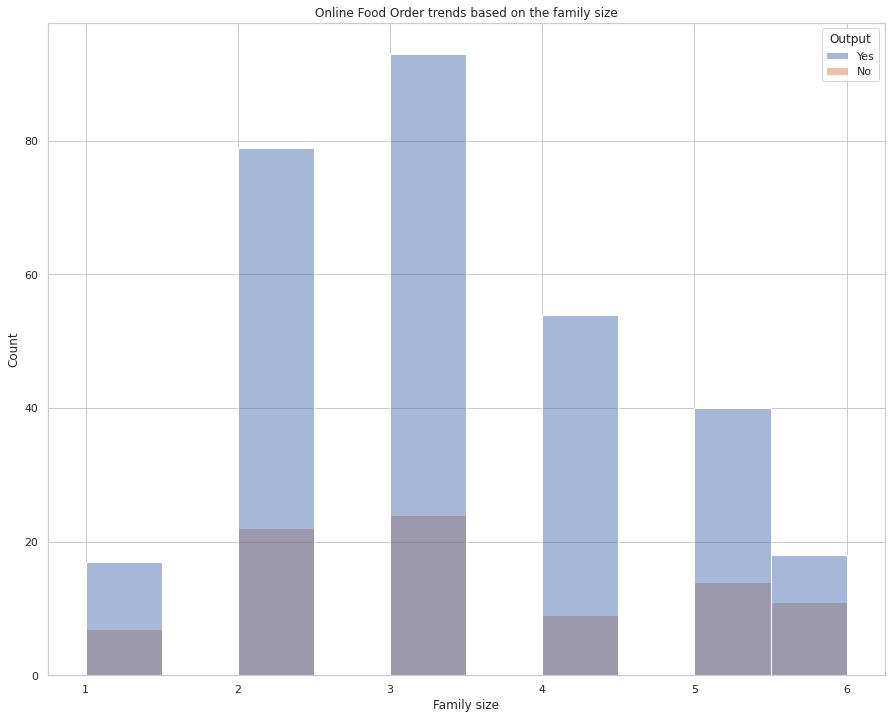

In [8]:
plt.figure(figsize=(15,12))
plt.title("Online Food Order trends based on the family size")
sns.histplot(x='Family size',hue='Output',data=data)
plt.show()

Families with 2 and 3 members are ordering food often. These can be roommates, couples, or a family of three.

### Let's filter customers who are ordering food again 

In [9]:
buying_again_data = data.query("Output == 'Yes'")
print(buying_again_data.head(5))

   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output   Feedback Unnamed: 12  
0    Yes   Positive         Yes  
1    Yes   Positive         Yes  
2    Yes  Negative          Yes  
3    Yes   Positive         Yes  
4    Yes   P

### Lets observe Food ordering trends by Gender

In [10]:
gender = buying_again_data['Gender'].value_counts()
label = gender.index
counts = gender.values
colors = ['blue','red']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

According to the dataset, male customers 58.1% are ordering more compared the females 41.9%. 
- Now let’s have a look at the marital status of the customers who ordered again:

In [11]:
marital = buying_again_data["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 76.1% of the frequent customers are singles. 
- Now let’s have a look at what’s the income group of the customers who ordered the food again:

In [12]:
income = buying_again_data["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

According to the above figure, 54% of the customers don’t fall under any income group. They can be students.

# Now let’s prepare the data for the task of training a machine learning model. Here I will convert all the categorical features into numerical values:

In [13]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

# Online Food Order Prediction Model

Now let’s train a machine learning model to predict whether a customer will order again or not. I will start by splitting the data into training and test sets:




In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [16]:
# Now Lets train our ML Model 
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=42)
model = RandomForestClassifier()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.9487179487179487


<ipython-input-16-6416bc707af9>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Now let’s prepare a form to input the data of the customer and predict whether the customer will order the food again or not:

In [17]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model.predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer:  27
Enter the Gender of the Customer (1 = Male, 0 = Female):  1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed):  1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4):  2
Monthly Income:  58000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5):  2
Family Size:  4
Pin Code:  400615
Review of the Last Order (1 = Positive, 0 = Negative):  1
Finding if the customer will order again:  ['Yes']
